ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the dataset look like?
- Are there missing values?
- Are there duplicates or outliers?
- What patterns exist in the data?
- Which features relate to the target?

**Dataset:** Ames Housing (House Prices)  
**Target:** SalePrice (Regression)


In [43]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()


In [44]:
# Load Dataset

df = pd.read_csv("train.csv")

# Display first 5 rows
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check Missing Values

In [45]:
# Check all values (True/False table)
print(df.isna())


         Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False 

In [46]:
# Count missing values per column
print(df.isna().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### Check duplicate rows

In [47]:
# Checking duplicate rows
df.duplicated()[df.duplicated() == True]


,0


### No. of rows and columns

In [48]:
# Finding number of rows and columns

print("Shape (rows, columns): ", df.shape, "\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])


Shape (rows, columns):  (1460, 81) 

number of rows:  1460
number of columns:  81


### Data type of columns

In [49]:
# Viewing the data types of columns
df.dtypes


,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [50]:
# Verify important columns are the expected types

df[["SalePrice", "GrLivArea", "OverallQual"]].dtypes


,0
SalePrice,int64
GrLivArea,int64
OverallQual,int64


### Descriptive summary Statistics

In [51]:
# Statistical summary
df.describe(include='all')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### Univariate Analysis

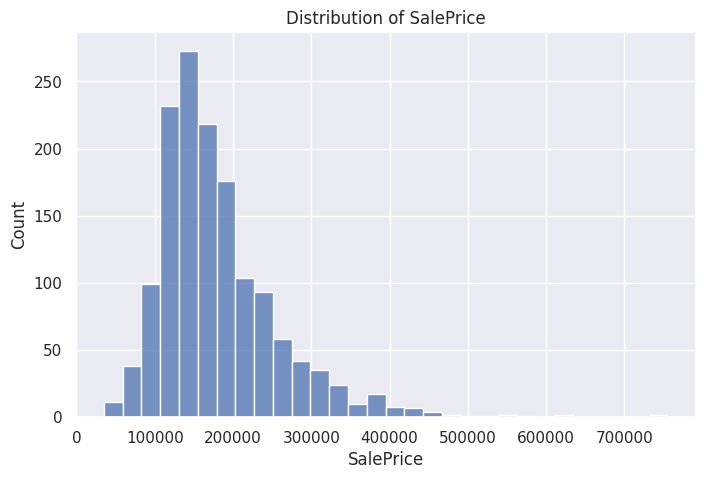

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], bins=30)
plt.title("Distribution of SalePrice")
plt.show()


- Shows how house prices are distributed
- Right skew = many mid-range houses, fewer expensive houses


### Distribution of Living Area (GrLivArea)

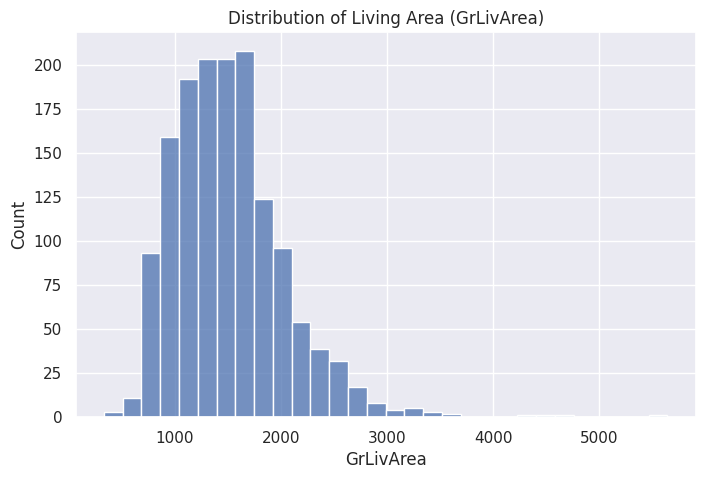

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(df["GrLivArea"], bins=30)
plt.title("Distribution of Living Area (GrLivArea)")
plt.show()


## Bivariate Analysis

### SalePrice by Overall Quality


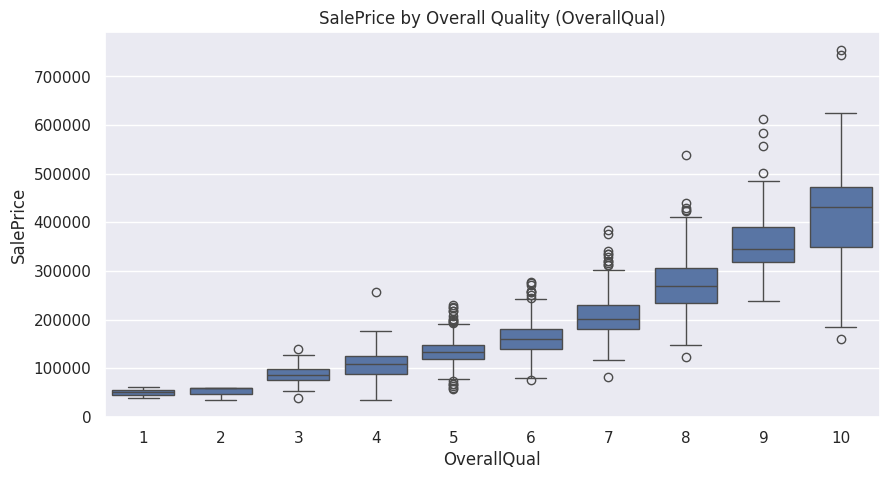

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("SalePrice by Overall Quality (OverallQual)")
plt.ylabel("SalePrice")
plt.show()


### SalePrice by Neighborhood


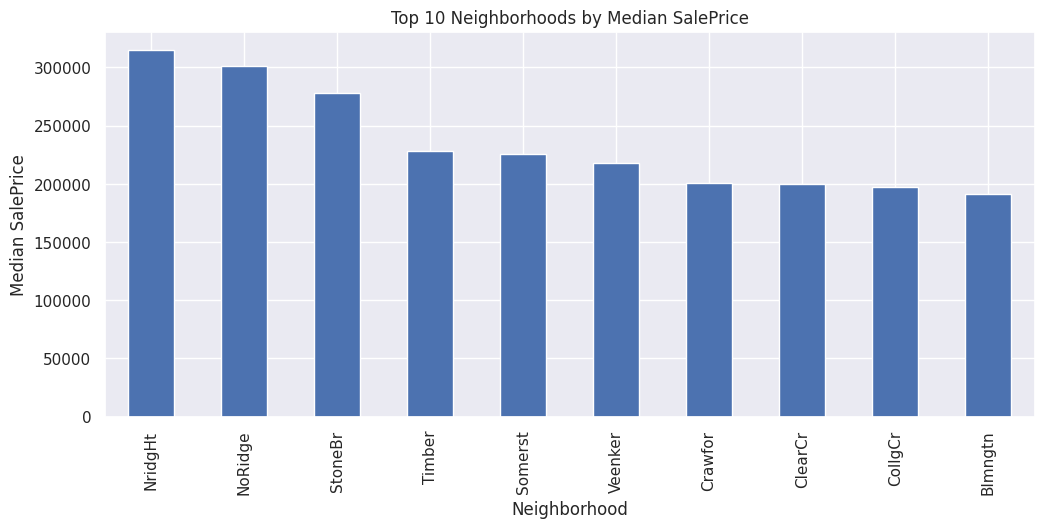

In [55]:
neighborhood_price = df.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False)

plt.figure(figsize=(12,5))
neighborhood_price.head(10).plot(kind="bar")
plt.title("Top 10 Neighborhoods by Median SalePrice")
plt.ylabel("Median SalePrice")
plt.show()


### SalePrice by Neighborhood

In [56]:
# SalePrice by Neighborhood (Top 10 by median SalePrice)

neighborhood_price = df.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False)

neighborhood_price.head(10)


,SalePrice
Neighborhood,
NridgHt,315000.0
NoRidge,301500.0
StoneBr,278000.0
Timber,228475.0
Somerst,225500.0
Veenker,218000.0
Crawfor,200624.0
ClearCr,200250.0
CollgCr,197200.0


### Living Area vs SalePrice Relationship


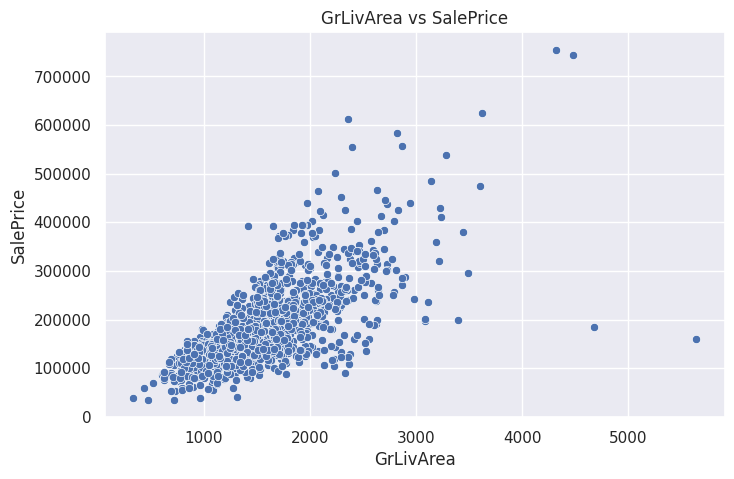

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("GrLivArea vs SalePrice")
plt.show()


### Correlation Matrix

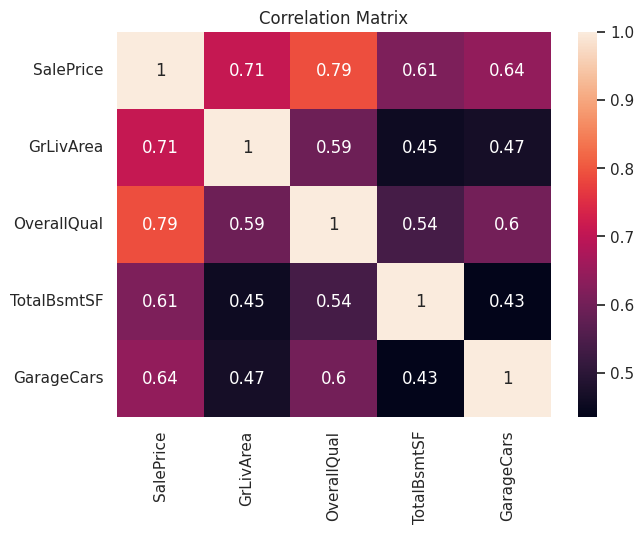

In [58]:
# Correlation matrix for a few important numeric columns
plt.figure(figsize=(7,5))
sns.heatmap(df[["SalePrice", "GrLivArea", "OverallQual", "TotalBsmtSF", "GarageCars"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship


## Time-Based Analysis
### Monthly Revenue Trend

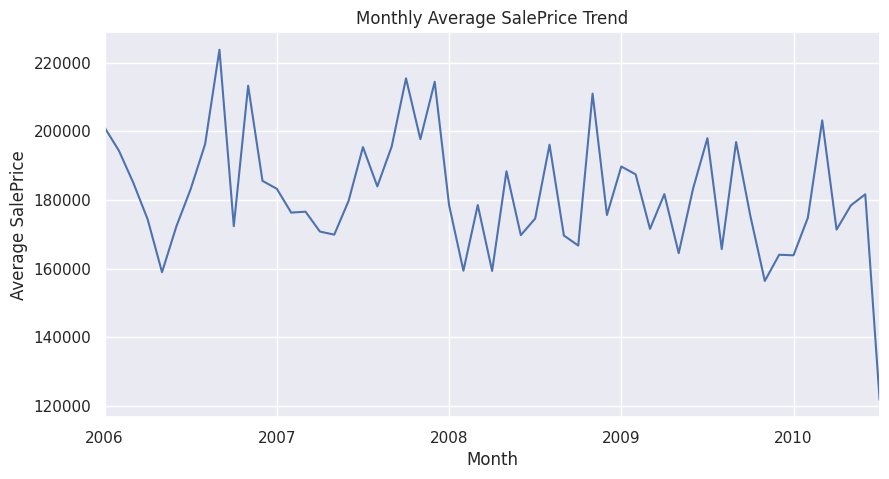

In [59]:
# Create a proper datetime column from Year and Month sold

df["SaleDate"] = pd.to_datetime(
    dict(year=df["YrSold"], month=df["MoSold"], day=1)
)

# Extract monthly period
df["Month"] = df["SaleDate"].dt.to_period("M")

# Calculate average SalePrice per month
monthly_price = df.groupby("Month")["SalePrice"].mean()

# Plot the monthly trend
plt.figure(figsize=(10,5))
monthly_price.plot()
plt.title("Monthly Average SalePrice Trend")
plt.ylabel("Average SalePrice")
plt.show()


# Assignment

In this assignment, EDA techniques were applied to the Ames Housing dataset. The notebook includes:
- Loading and inspecting the dataset
- Checking missing values and duplicates
- Summary statistics
- Univariate and bivariate visualizations
- Correlation analysis

End of lab 3.
